## Lab 6 - Spatial Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import censusdata

### Overview of data sources:
- Census: provides census block boundaries (multi-polygon)
- Crime: crime with location (lat/long)

In [2]:
# converting files to geodataframes
def crimes_gdf():
    crimes = pd.read_csv('https://data.cityofchicago.org/api/views/w98m-zvie/rows.csv?accessType=DOWNLOAD')
    crimes.dropna(inplace=True)
    crimes_gdf = gpd.GeoDataFrame(crimes, geometry=gpd.points_from_xy(crimes.Longitude, crimes.Latitude))
    return crimes_gdf

In [3]:
crimes_gdf = crimes_gdf()
crimes_gdf.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,geometry
1,11985994,JD157619,07/22/2019 12:00:00 AM,046XX S DR MARTIN LUTHER KING JR DR,1140,DECEPTIVE PRACTICE,EMBEZZLEMENT,BANK,False,False,...,38,12,1179637.0,1874416.0,2019,11/08/2020 03:47:40 PM,41.810678,-87.616627,"(41.810677511, -87.616626532)",POINT (-87.61663 41.81068)
2,11769231,JC362296,07/24/2019 09:33:00 AM,004XX W DIVISION ST,0325,ROBBERY,VEHICULAR HIJACKING,PARKING LOT / GARAGE (NON RESIDENTIAL),True,False,...,8,03,1173175.0,1908290.0,2019,11/08/2020 03:47:40 PM,41.903776,-87.639324,"(41.903775756, -87.639324074)",POINT (-87.63932 41.90378)
3,11941967,JD104573,12/30/2019 04:00:00 PM,043XX S WOOD ST,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,APARTMENT,False,True,...,61,17,1165073.0,1875977.0,2019,11/07/2020 03:51:39 PM,41.815282,-87.670002,"(41.81528195, -87.670001531)",POINT (-87.67000 41.81528)
4,11803428,JC403368,08/22/2019 10:20:00 PM,016XX S MILLARD AVE,0420,BATTERY,AGGRAVATED - KNIFE / CUTTING INSTRUMENT,SIDEWALK,False,False,...,29,04B,1152308.0,1891622.0,2019,11/07/2020 03:51:39 PM,41.858475,-87.716414,"(41.858474674, -87.716413812)",POINT (-87.71641 41.85847)
5,11733619,JC319325,06/24/2019 07:40:00 AM,028XX W CULLERTON ST,0650,BURGLARY,HOME INVASION,APARTMENT,True,False,...,30,05,1157666.0,1890270.0,2019,11/07/2020 03:51:39 PM,41.854657,-87.696783,"(41.854657313, -87.696783221)",POINT (-87.69678 41.85466)


In [4]:
# this one was already a geojson file
census_gdf = gpd.read_file("https://data.cityofchicago.org/resource/bt9m-d2mf.geojson?$limit=9999999")
census_gdf.head()

,statefp10,name10,blockce10,tract_bloc,geoid10,tractce10,countyfp10,geometry
0,17,Block 2010,2010,6903002010,170316903002010,690300,031,"MULTIPOLYGON (((-87.62907 41.76909, -87.62905 ..."
1,17,Block 3007,3007,6809003007,170316809003007,680900,031,"MULTIPOLYGON (((-87.63412 41.77447, -87.63410 ..."
2,17,Block 3013,3013,6809003013,170316809003013,680900,031,"MULTIPOLYGON (((-87.63485 41.77263, -87.63522 ..."
3,17,Block 4019,4019,2909004019,170312909004019,290900,031,"MULTIPOLYGON (((-87.73841 41.85913, -87.73842 ..."
4,17,Block 4016,4016,2925004016,170312925004016,292500,031,"MULTIPOLYGON (((-87.73217 41.85476, -87.73226 ..."


In [5]:
# setting coordinate systems (may be needed if there are inconsistencies)
crimes_gdf.crs = "EPSG:4326"
census_gdf.crs = "EPSG:4326"

In [6]:
# merged the census data with crime data using spatial join
merged_gdf = gpd.sjoin(census_gdf, crimes_gdf, how="inner", op='intersects')
merged_gdf.head()

,statefp10,name10,blockce10,tract_bloc,geoid10,tractce10,countyfp10,geometry,index_right,ID,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,17,Block 2010,2010,6903002010,170316903002010,690300,031,"MULTIPOLYGON (((-87.62907 41.76909, -87.62905 ...",33336,11899059,...,6.0,69,05,1176161.0,1858865.0,2019,11/28/2019 03:54:57 PM,41.768083,-87.629843,"(41.768082823, -87.629842776)"
0,17,Block 2010,2010,6903002010,170316903002010,690300,031,"MULTIPOLYGON (((-87.62907 41.76909, -87.62905 ...",135463,11747591,...,6.0,69,06,1176161.0,1858893.0,2019,07/19/2019 04:09:50 PM,41.768160,-87.629842,"(41.768159658, -87.629841936)"
0,17,Block 2010,2010,6903002010,170316903002010,690300,031,"MULTIPOLYGON (((-87.62907 41.76909, -87.62905 ...",225066,11639148,...,6.0,69,06,1176160.0,1858899.0,2019,04/03/2019 04:04:24 PM,41.768176,-87.629845,"(41.768176145, -87.629845422)"
0,17,Block 2010,2010,6903002010,170316903002010,690300,031,"MULTIPOLYGON (((-87.62907 41.76909, -87.62905 ...",164909,11703527,...,6.0,69,26,1176160.0,1858906.0,2019,06/30/2019 03:56:27 PM,41.768195,-87.629845,"(41.768195354, -87.629845212)"
0,17,Block 2010,2010,6903002010,170316903002010,690300,031,"MULTIPOLYGON (((-87.62907 41.76909, -87.62905 ...",185118,11575248,...,6.0,69,18,1176160.0,1858920.0,2019,01/30/2019 04:14:07 PM,41.768234,-87.629845,"(41.768233772, -87.629844792)"


In [7]:
# keeping only necessary columns
limited_gdf = merged_gdf[["ID", "Case Number", "Year", "Primary Type", "blockce10", "geoid10", "geometry"]]

# clean data
limited_gdf = limited_gdf.dropna()
limited_gdf = limited_gdf.drop_duplicates('Case Number')
limited_gdf.head()

,ID,Case Number,Year,Primary Type,blockce10,geoid10,geometry
0,11899059,JC518571,2019,BURGLARY,2010,170316903002010,"MULTIPOLYGON (((-87.62907 41.76909, -87.62905 ..."
0,11747591,JC336595,2019,THEFT,2010,170316903002010,"MULTIPOLYGON (((-87.62907 41.76909, -87.62905 ..."
0,11639148,JC197495,2019,THEFT,2010,170316903002010,"MULTIPOLYGON (((-87.62907 41.76909, -87.62905 ..."
0,11703527,JC282979,2019,OTHER OFFENSE,2010,170316903002010,"MULTIPOLYGON (((-87.62907 41.76909, -87.62905 ..."
0,11575248,JC127146,2019,NARCOTICS,2010,170316903002010,"MULTIPOLYGON (((-87.62907 41.76909, -87.62905 ..."


### Dissolve
Documentation: https://geopandas.org/aggregation_with_dissolve.html

Similar to groupby except for geospatial objects.

aggfunc = arguments:
* ‘first’
* ‘last’
* ‘min’
* ‘max’
* ‘sum’
* ‘mean’
* ‘median’


In [15]:
# dissolve - "group by" for geometric features
count_by_block = limited_gdf.dissolve(by=['geoid10', 'Year'], aggfunc='count').reset_index()
count_by_block.rename(columns={'ID':'crime_count'},inplace=True)
count_by_block.drop(['Case Number', 'Primary Type', 'blockce10'], axis=1,inplace=True)
count_by_block['log_crime_count'] = np.log(count_by_block['crime_count'])
count_by_block.head()

,geoid10,Year,geometry,crime_count,log_crime_count
0,170310101001000,2019,"POLYGON ((-87.66635 42.02252, -87.66666 42.022...",5,1.609438
1,170310101001001,2019,"POLYGON ((-87.66754 42.02224, -87.66763 42.022...",11,2.397895
2,170310101001002,2019,"POLYGON ((-87.67009 42.02226, -87.66994 42.022...",1,0.000000
3,170310101001003,2019,"POLYGON ((-87.67009 42.02115, -87.67047 42.021...",56,4.025352
4,170310101002000,2019,"POLYGON ((-87.67188 42.02299, -87.67007 42.022...",8,2.079442


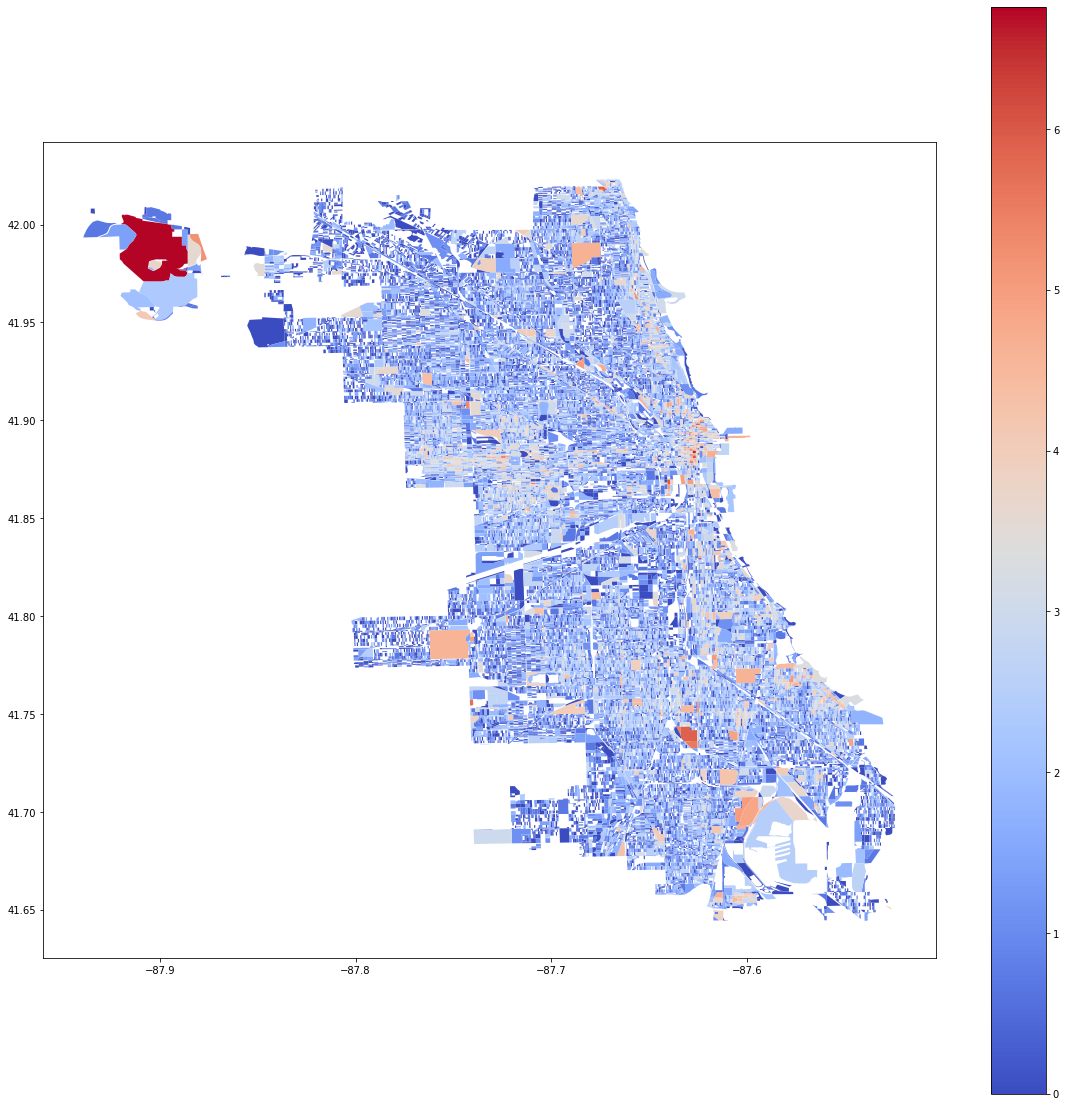

In [18]:
count_by_block.plot(figsize=(20, 20), column='log_crime_count', cmap=plt.cm.coolwarm, legend=True)